## k近邻回归

In [1]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

k近邻算法还可用于回归

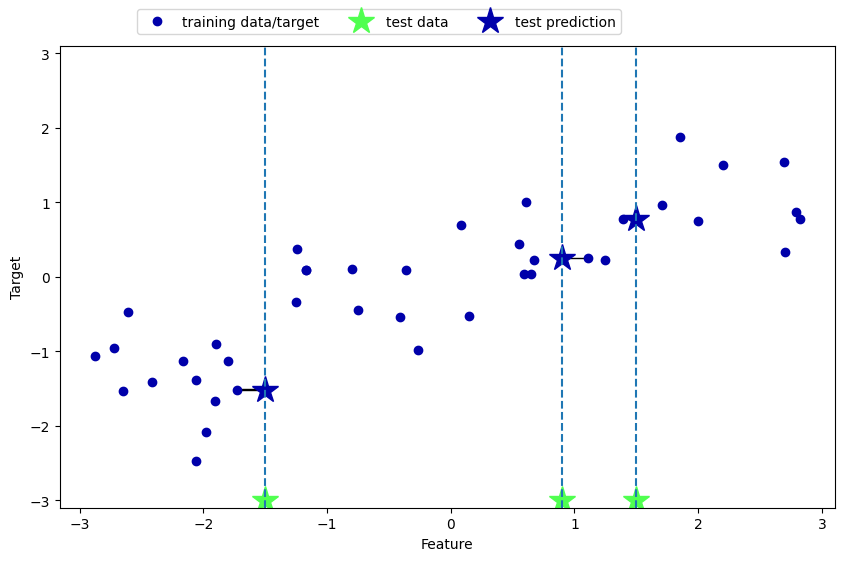

In [7]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
# 单一邻回归对wave数据集的预测

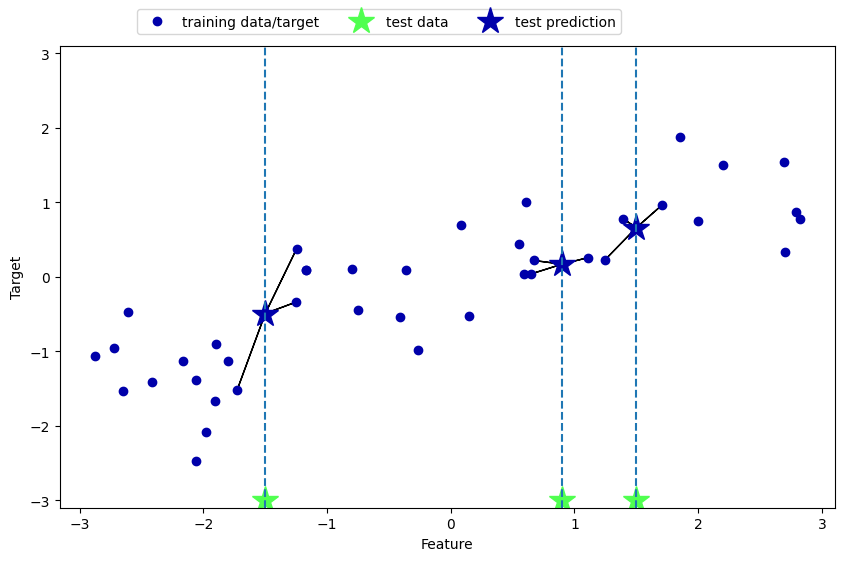

In [6]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
# 3个近邻回归对wave数据集的预测


用于回归的k近邻算法在scikit-learn的KNeighborsRegressor 类中实现。其用法与KNeighborsClassifier 类似:

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=40)
# 将wave数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
# 实例化，并邻居数为3
reg = KNeighborsRegressor(n_neighbors=3)
# 利用训练数据和训练目标来拟合模型
reg.fit(X_train,y_train)
# 对测试集进行测试
print("Test set predictions:\n{}".format(reg.predict(X_test)))
print('\n')
# 模型评估
print("Test R^2 :{:.2f}".format(reg.score(X_test,y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


Test R^2 :0.83


## 分析KNeighborsRegressor

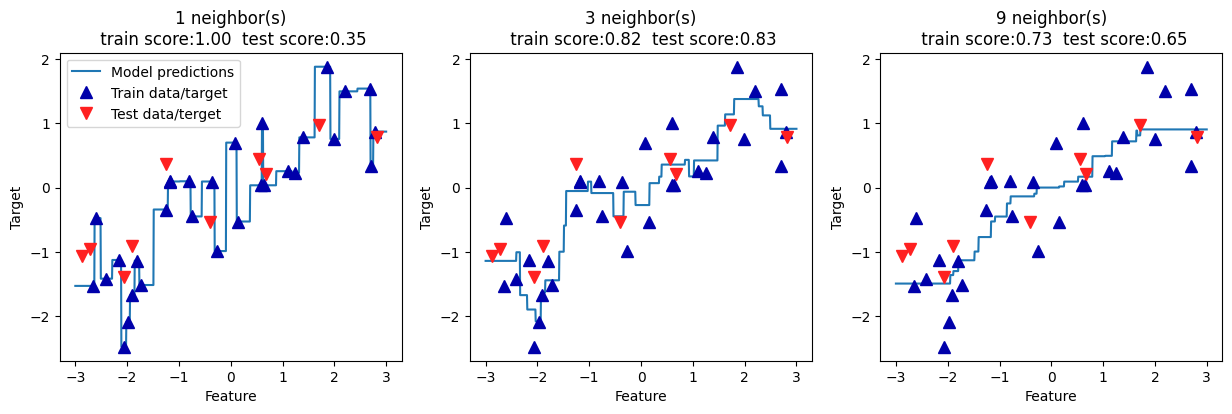

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15,4)) # 创建子图
# 创建一千个数据点，均匀分布在-3到3之间
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9],axes):
    # 利用1个，3个，9个邻居分别进行测试
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize = 8)
    ax.set_title(
        "{} neighbor(s)\n train score:{:.2f}  test score:{:.2f}".format(n_neighbors,reg.score(X_train,y_train),
        reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(['Model predictions', 'Train data/target', 'Test data/terget'],loc = 'best')
# 不同n_neighbors值的K近邻预测回归结果对比

KNeighbors分类器有2个重要参数:邻居个数与数据点之间距离的度量方法

在实践中，使用较小的邻居个数(比如3 个或5个)往往可以得到比较好的结果，但你应该调节这个参数。默认使用欧式距离，它在许多情况下的效果都很好。

k-NN 的优点之一就是模型很容易理解，通常不需要过多调节就可以得到不错的性能。在考虑使用更高级的技术之前，尝试此算法是一种很好的基准方法。构建最近邻模型的速度通常很快，但如果训练集很大(特征数很多或者样本数很大)，预测速度可能会比较慢使用k-NN算法时，对数据进行预处理是很重要的。这一算法对于有很多特征(几百或更多) 的数据集往往效果不好，对于大多数特征的大多数取值都为0的数据集(所谓的稀疏数据集)来说，这一算法的效果尤其不好。

虽然k近邻算法很容易理解，但由于预测速度慢且不能处理具有很多特征的数据集，所以在实践中往往不会用到。